## Introducción

¡Bienvenido a este Notebook! Este es el proyecto Capstone para el curso de Ciencia de Datos de IBM en Coursera.

En este notebook vamos a tratar de analizar los municipios de la ciudad de Valladolid en España, con el objetivo de saber dónde es adecuado 
abrir un nuevo restaurante.

Valladolid es una ciudad muy gastronómica con un amplio surtido de locales destinados a ello.
Nuestra intención, a través de los datos, será conseguir analizar qué municipios del extrarradio han crecido más en los últimos años, 
y valorar la competencia ya existente en ellos a través de la API de Foursquare.

En base a nuestros datos, determinaremos con Machine Learning, qué crecimiento podrían tener los municipios en los próximos años para facilitar nuestra decisión.

Finalizarémos dando el resultado objetivo, y justificando porqué sería óptimo abrir un restaurante en la Provincia. Esto le puede servir a futuros
inversores, o propietarios de negocios gastronómicos que busquen una localización para su nuevo negocio.

<img src="va.jpg" alt="Valladolid" width="1000" height="500">



## Datos

Vamos a utilizar varios conjuntos de datos. Entre ellos, los datos de migraciones de la ciudad de Valladolid hacia la comunidad urbana de la misma. 
Más adelante localizarémos por coordenadas, a través de Foursquare, qué restaurantes existen en cada zona.
Empecemos con los migratorios:

In [31]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot')
%matplotlib inline

In [32]:
df = pd.read_csv("vaResi2.csv")  # Importamos los datos

In [33]:
df.head()

,MUNICIPIO DE DESTINO,1997,1998,1999,2000,2001,2002,2003,2004,2005,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aldeamayor de San Martín,77.0,39.0,51.0,79.0,73.0,99.0,84.0,97.0,114.0,...,113.0,121.0,118.0,81,141,140,128,133,130,160
1,Arroyo de la Encomienda,314.0,435.0,416.0,384.0,512.0,400.0,534.0,676.0,1110.0,...,796.0,659.0,738.0,553,544,487,650,574,417,594
2,Boecillo,100.0,97.0,88.0,120.0,159.0,160.0,170.0,118.0,110.0,...,87.0,92.0,79.0,70,66,92,69,91,88,103
3,Cabezón de Pisuerga,42.0,44.0,58.0,77.0,118.0,137.0,153.0,170.0,179.0,...,96.0,79.0,55.0,62,80,86,77,86,62,79
4,Castronuevo de Esgueva,2.0,16.0,15.0,11.0,14.0,10.0,11.0,20.0,8.0,...,4.0,6.0,12.0,3,4,3,10,11,10,16


In [34]:
df = df.dropna()  # Eliminamos los resultados que no contienen valor
df.tail()

,MUNICIPIO DE DESTINO,1997,1998,1999,2000,2001,2002,2003,2004,2005,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
18,Valdestillas,18.0,31.0,45.0,25.0,35.0,41.0,41.0,52.0,76.0,...,31.0,37.0,24.0,20,12,24,14,27,20,28
19,Viana de Cega,33.0,75.0,67.0,47.0,85.0,68.0,59.0,79.0,74.0,...,40.0,25.0,43.0,48,50,37,49,63,103,41
20,Villanubla,1.0,19.0,36.0,68.0,85.0,76.0,50.0,107.0,61.0,...,68.0,67.0,68.0,58,55,60,49,54,60,79
21,Villanueva de Duero,27.0,34.0,43.0,40.0,57.0,46.0,54.0,59.0,43.0,...,30.0,34.0,19.0,15,21,17,30,26,29,32
23,Zaratán,9.0,23.0,146.0,154.0,149.0,129.0,252.0,529.0,579.0,...,172.0,192.0,181.0,176,123,145,166,151,122,150


In [35]:
df.iloc[:, 1:] = df.iloc[:, 1:].apply(lambda x: pd.to_numeric(x, errors='coerce').astype(int))  # Con esto damos forma a los datos, cambiando su tipo a números enteros

C:\Users\Jesús\AppData\Local\Temp\ipykernel_9172\572881042.py:1: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:, 1:] = df.iloc[:, 1:].apply(lambda x: pd.to_numeric(x, errors='coerce').astype(int))  # Con esto damos forma a los datos, cambiando su tipo a números enteros


In [36]:
df.head()

,MUNICIPIO DE DESTINO,1997,1998,1999,2000,2001,2002,2003,2004,2005,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aldeamayor de San Martín,77,39,51,79,73,99,84,97,114,...,113,121,118,81,141,140,128,133,130,160
1,Arroyo de la Encomienda,314,435,416,384,512,400,534,676,1110,...,796,659,738,553,544,487,650,574,417,594
2,Boecillo,100,97,88,120,159,160,170,118,110,...,87,92,79,70,66,92,69,91,88,103
3,Cabezón de Pisuerga,42,44,58,77,118,137,153,170,179,...,96,79,55,62,80,86,77,86,62,79
4,Castronuevo de Esgueva,2,16,15,11,14,10,11,20,8,...,4,6,12,3,4,3,10,11,10,16


In [37]:
df = df.set_index("MUNICIPIO DE DESTINO")

In [38]:
df.tail()

,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
MUNICIPIO DE DESTINO,,,,,,,,,,,,,,,,,,,,,
Valdestillas,18,31,45,25,35,41,41,52,76,46,...,31,37,24,20,12,24,14,27,20,28
Viana de Cega,33,75,67,47,85,68,59,79,74,52,...,40,25,43,48,50,37,49,63,103,41
Villanubla,1,19,36,68,85,76,50,107,61,195,...,68,67,68,58,55,60,49,54,60,79
Villanueva de Duero,27,34,43,40,57,46,54,59,43,55,...,30,34,19,15,21,17,30,26,29,32
Zaratán,9,23,146,154,149,129,252,529,579,591,...,172,192,181,176,123,145,166,151,122,150


In [39]:
df["Total"] = df.sum(axis=1)  # Vamos a totalizar los resultados de los años desde 1997 al 2021, y así determinar qué municipios recibieron más migración

In [40]:
df.head()

,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Total
MUNICIPIO DE DESTINO,,,,,,,,,,,,,,,,,,,,,
Aldeamayor de San Martín,77,39,51,79,73,99,84,97,114,239,...,121,118,81,141,140,128,133,130,160,3544
Arroyo de la Encomienda,314,435,416,384,512,400,534,676,1110,1185,...,659,738,553,544,487,650,574,417,594,16324
Boecillo,100,97,88,120,159,160,170,118,110,209,...,92,79,70,66,92,69,91,88,103,2867
Cabezón de Pisuerga,42,44,58,77,118,137,153,170,179,193,...,79,55,62,80,86,77,86,62,79,2542
Castronuevo de Esgueva,2,16,15,11,14,10,11,20,8,12,...,6,12,3,4,3,10,11,10,16,244


In [41]:
df.sort_values(['Total'], ascending=False, axis=0, inplace=True)

df_top5 = df.head()  # Hacemos un Top 5 de los municipios con más migración en su totalidad


In [42]:
df_top5 = df_top5.drop(["Total"], axis=1)

In [43]:
df_top5.head()

,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
MUNICIPIO DE DESTINO,,,,,,,,,,,,,,,,,,,,,
Arroyo de la Encomienda,314,435,416,384,512,400,534,676,1110,1185,...,796,659,738,553,544,487,650,574,417,594
Laguna de Duero,370,892,867,890,1069,706,460,378,431,429,...,431,349,284,280,236,219,235,230,229,262
Cistérniga,142,418,534,255,319,304,531,597,543,555,...,235,247,186,186,163,185,174,123,133,161
Zaratán,9,23,146,154,149,129,252,529,579,591,...,172,192,181,176,123,145,166,151,122,150
Santovenia de Pisuerga,192,152,172,169,199,192,162,220,202,248,...,121,183,162,130,149,131,191,152,122,138


In [44]:
df_top5 = df_top5.transpose()
df_top5.head()

MUNICIPIO DE DESTINO,Arroyo de la Encomienda,Laguna de Duero,Cistérniga,Zaratán,Santovenia de Pisuerga
1997,314,370,142,9,192
1998,435,892,418,23,152
1999,416,867,534,146,172
2000,384,890,255,154,169
2001,512,1069,319,149,199


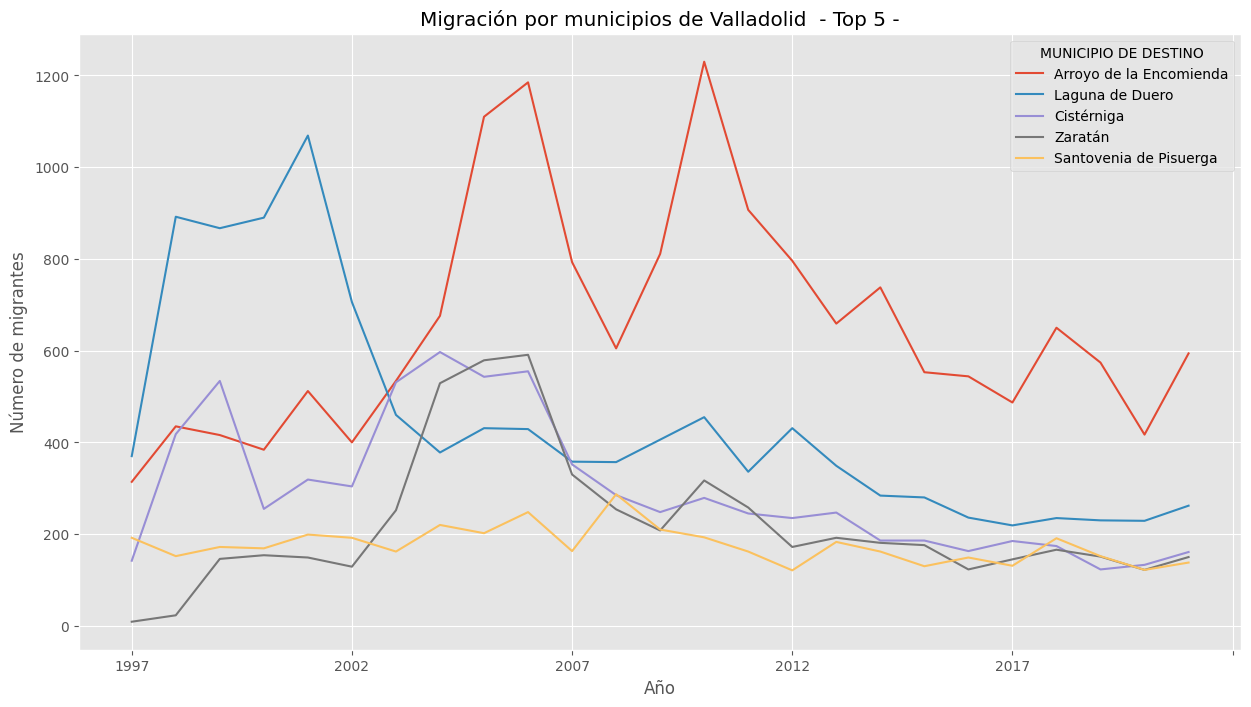

In [45]:
df_top5.plot(kind = "line", figsize=(15, 8))  # Vamosa graficar nuestro Top 5 para entender mejor los datos y determinar su crecimiento

plt.title('Migración por municipios de Valladolid  - Top 5 -')
plt.ylabel('Número de migrantes')
plt.xlabel('Año')

plt.show()